# Tales from the Crypto

---


## 1. Sentiment Analysis

Use the news api to pull the latest news articles for bitcoin and ethereum and create a DataFrame of sentiment scores for each coin. 

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [30]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
from newsapi import NewsApiClient
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\akinnubisa\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [31]:
# Read your api key environment variable
load_dotenv("envi.env")
api_key = os.getenv("news_api")
type(api_key)

str

In [32]:
# Create a newsapi client
newsapi = NewsApiClient(api_key=api_key)
newsapi

In [33]:
# Fetch the Bitcoin news articles
bitcoin_news_en = newsapi.get_everything(
    q="Bitcoin",
    language="en"
)

# Show the total number of news
bitcoin_news_en["totalResults"]

8663

In [34]:
# Fetch the Ethereum news articles
ethereum_news_en = newsapi.get_everything(
    q="Ethereum",
    language="en"
)

# Show the total number of news
ethereum_news_en["totalResults"]

2047

In [35]:
# Create the Bitcoin sentiment scores DataFrame
bitcoin_sentiments = []

for article in bitcoin_news_en["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        bitcoin_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
bitcoin_df = pd.DataFrame(bitcoin_sentiments)

# Reorder DataFrame columns
cols = ["date", "text", "compound", "positive", "negative", "neutral"]
bitcoin_df = bitcoin_df[cols]

bitcoin_df.head()

,date,text,compound,positive,negative,neutral
0,2021-02-26,Some things are best left a mystery at least a...,0.6369,0.113,0.000,0.887
1,2021-03-03,,0.0000,0.000,0.000,0.000
2,2021-02-16,"Bitcoin is the future, again: this morning, it...",0.7041,0.140,0.000,0.860
3,2021-02-25,TL;DR: Enter the The Complete Bitcoin (BTC) In...,0.8316,0.246,0.000,0.754
4,2021-03-15,A proposed law in India would make it a crime ...,-0.2500,0.068,0.095,0.838


In [42]:
# Create the Ethereum sentiment scores DataFrame
ethereum_sentiments = []

for article in ethereum_news_en["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        ethereum_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
ethereum_df = pd.DataFrame(ethereum_sentiments)

# Reorder DataFrame columns
cols = ["date", "text", "compound", "positive", "negative", "neutral"]
ethereum_df = ethereum_df[cols]

ethereum_df.head()

,date,text,compound,positive,negative,neutral
0,2021-03-15,Famed auction house Christies just sold its fi...,0.0000,0.000,0.000,1.000
1,2021-02-18,Worried that the GeForce RTX 3060 will be sold...,-0.3400,0.063,0.119,0.818
2,2021-03-06,NFTs are the latest cryptocurrency rage these ...,-0.4588,0.066,0.145,0.789
3,2021-02-27,NFTs (non-fungible tokens) — or scarce digital...,0.4404,0.091,0.000,0.909
4,2021-02-20,While the first Christie's auction of digital ...,0.0258,0.030,0.000,0.970


In [43]:
# Describe the Bitcoin Sentiment
bitcoin_df.describe()

,compound,positive,negative,neutral
count,18.000000,18.000000,18.000000,18.000000
mean,0.219783,0.068167,0.016778,0.859500
std,0.360042,0.070671,0.040313,0.228093
min,-0.361200,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.855000
50%,0.051350,0.069000,0.000000,0.917500
75%,0.559650,0.108000,0.000000,0.989500
max,0.831600,0.246000,0.137000,1.000000


In [44]:
# Describe the Ethereum Sentiment
ethereum_df.describe()

,compound,positive,negative,neutral
count,20.000000,20.000000,20.000000,20.000000
mean,0.224570,0.078100,0.023950,0.898000
std,0.382841,0.060135,0.046013,0.068705
min,-0.458800,0.000000,0.000000,0.754000
25%,0.000000,0.053250,0.000000,0.859750
50%,0.307100,0.073500,0.000000,0.909000
75%,0.473275,0.096500,0.012000,0.931500
max,0.831600,0.246000,0.145000,1.000000


In [45]:
bitcoin_df.mean()

compound    0.219783
positive    0.068167
negative    0.016778
neutral     0.859500
dtype: float64

In [47]:
btc_positive_mean=round(bitcoin_df.mean(),3)
eth_positive_mean=round(ethereum_df.positive.mean(),3)
btc_compound_mean=round(bitcoin_df.compound.mean(),3)
#eth_compound_mean=round(ethereum_df.compound.mean(),3)
#btc_compound_max=round(bitcoin_df.compound.max(),3)
#eth_compound_max=round(ethereum_df.compound.max(),3)
#btc_positive_max=round(bitcoin_df.positive.max(),3)
#eth_positive_max=round(ethereum_df.positive.max(),3)

AttributeError: 'function' object has no attribute 'mean'

### Questions:

Q: Which coin had the highest mean positive score?

In [ ]:
print(f"A: Ethereum has the highest Mean Positive score of {eth_positive_mean} which is slightly higher than the mean positive score of Bitcoin of {btc_positive_mean} ")

Q: Which coin had the highest compound score?

In [26]:
print(f"A: Ethereum has the highest Maximum Compound score of {eth_compound_max}. At the same time, Bitcoin has the highest Mean Compound score of {btc_compound_mean} ")

NameError: name 'eth_compound_max' is not defined

Q. Which coin had the highest positive score?

In [13]:
print(f"A: Ethereum has the highest Maximum Positive score of {eth_positive_max}.")

A: Ethereum has the highest Maximum Positive score of 0.318.


---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word
2. Remove Punctuation
3. Remove Stopwords

In [48]:
# Initial imports
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re
from nltk.stem import WordNetLemmatizer 

In [49]:
# Expand the default stopwords list if necessary
sw_addons = {'said', 'sent', 'found', 'including', 'today', 'announced', 'week', 'basically', 'ha', 'char','also', 'reutersdado'}

In [50]:
# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()

In [51]:
# Complete the tokenizer function
def tokenizer(article):
    sw = set(stopwords.words('english'))
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', article)
    words = word_tokenize(re_clean)
    lem = [lemmatizer.lemmatize(word) for word in words]
    output = [word.lower() for word in lem if word.lower() not in sw.union(sw_addons)]
    return output

In [53]:
# Compile the list of lists of tokens for each Bitcoin article
btc_word_tokenized = []
for text in bitcoin_df.text:
    # Create a list of tokenized words for each article    
    words = []
    words = words + tokenizer(text)
    # append all lists of tokenized words for each article to the btc_word_tokenized list of lists
    btc_word_tokenized.append(words)
print(btc_word_tokenized)

[['thing', 'best', 'left', 'mystery', 'least', 'far', 'coinbase', 'concernedthe', 'san', 'franciscobased', 'cryptocurrency', 'exchange', 'preparing', 'go', 'public', 'since', 'last', 'year', 'thursday', 'pro'], [], ['bitcoin', 'future', 'morning', 'hit', 'alltime', 'high', 'value', 'lesson', 'elon', 'musks', 'tweet', 'good', 'investment', 'strategy', 'get'], ['tldr', 'enter', 'complete', 'bitcoin', 'btc', 'investment', 'giveaway', 'chance', 'win', 'cryptocurrencyrelated', 'prizesthe', 'bitcoin', 'investment', 'giveaway', 'includes', 'everything', 'need', 'get'], ['proposed', 'law', 'india', 'would', 'make', 'crime', 'mine', 'trade', 'even', 'hold', 'cryptocurrencies', 'like', 'bitcoin', 'country', 'according', 'new', 'report', 'reuters', 'citing', 'senior', 'government', 'official'], ['new', 'york', 'cnn', 'businessbitcoins', 'roller', 'coaster', 'ride', 'continues', 'top', 'cryptocurrency', 'surged', 'new', 'alltime', 'high', 'sunday', 'fell', 'early', 'trading', 'tuesday', 'mo'], ['b

In [54]:
# Create a new tokens column for Bitcoin
bitcoin_df["tokens"]=btc_word_tokenized
bitcoin_df.head()

,date,text,compound,positive,negative,neutral,tokens
0,2021-02-26,Some things are best left a mystery at least a...,0.6369,0.113,0.000,0.887,"[thing, best, left, mystery, least, far, coinb..."
1,2021-03-03,,0.0000,0.000,0.000,0.000,[]
2,2021-02-16,"Bitcoin is the future, again: this morning, it...",0.7041,0.140,0.000,0.860,"[bitcoin, future, morning, hit, alltime, high,..."
3,2021-02-25,TL;DR: Enter the The Complete Bitcoin (BTC) In...,0.8316,0.246,0.000,0.754,"[tldr, enter, complete, bitcoin, btc, investme..."
4,2021-03-15,A proposed law in India would make it a crime ...,-0.2500,0.068,0.095,0.838,"[proposed, law, india, would, make, crime, min..."


In [55]:
# Compile the list of lists of tokens for each Ethereum article
eth_word_tokenized = []
for text in ethereum_df.text:
   # Create a list of tokenized words for each article 
    words = []
    words = words + tokenizer(text)
    # append all lists of tokenized words for each article to the eth_word_tokenized list of lists
    eth_word_tokenized.append(words)
print(eth_word_tokenized)

[['famed', 'auction', 'house', 'christies', 'sold', 'first', 'purely', 'digital', 'piece', 'art', 'whopping', 'million', 'price', 'buyer', 'got', 'digital', 'file', 'collage', 'image', 'complex', 'legac'], ['worried', 'geforce', 'rtx', 'sold', 'cryptocurrency', 'miner', 'snap', 'every', 'gpu', 'sight', 'nvidia', 'think', 'simple', 'way', 'help', 'make', 'new', 'card', 'unattractive', 'crypto', 'crowd'], ['nfts', 'latest', 'cryptocurrency', 'rage', 'day', 'band', 'like', 'kings', 'leon', 'releasing', 'next', 'album', 'limited', 'edition', 'golden', 'ticket', 'nba', 'digital', 'collectible', 'sold', 'million'], ['nfts', 'nonfungible', 'token', 'scarce', 'digital', 'content', 'represented', 'token', 'driving', 'new', 'wave', 'crypto', 'adoptionthanks', 'ethereum', 'blockchain', 'artist', 'gaming', 'company', 'content', 'cre'], ['first', 'christies', 'auction', 'digital', 'artwork', 'backed', 'nft', 'nonfungible', 'token', 'still', 'day', 'away', 'one', 'notable', 'sale', 'world', 'already

In [56]:
# Create a new tokens column for Ethereum
ethereum_df["tokens"]=eth_word_tokenized
ethereum_df.head()

,date,text,compound,positive,negative,neutral,tokens
0,2021-03-15,Famed auction house Christies just sold its fi...,0.0000,0.000,0.000,1.000,"[famed, auction, house, christies, sold, first..."
1,2021-02-18,Worried that the GeForce RTX 3060 will be sold...,-0.3400,0.063,0.119,0.818,"[worried, geforce, rtx, sold, cryptocurrency, ..."
2,2021-03-06,NFTs are the latest cryptocurrency rage these ...,-0.4588,0.066,0.145,0.789,"[nfts, latest, cryptocurrency, rage, day, band..."
3,2021-02-27,NFTs (non-fungible tokens) — or scarce digital...,0.4404,0.091,0.000,0.909,"[nfts, nonfungible, token, scarce, digital, co..."
4,2021-02-20,While the first Christie's auction of digital ...,0.0258,0.030,0.000,0.970,"[first, christies, auction, digital, artwork, ..."


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [57]:
from collections import Counter
from nltk import ngrams

In [58]:
# Create a flat list of Bitcoin tokenized words from a list of list
btc_flat_word_tokenized_list = [item for elem in btc_word_tokenized for item in elem]
print(btc_flat_word_tokenized_list)

['thing', 'best', 'left', 'mystery', 'least', 'far', 'coinbase', 'concernedthe', 'san', 'franciscobased', 'cryptocurrency', 'exchange', 'preparing', 'go', 'public', 'since', 'last', 'year', 'thursday', 'pro', 'bitcoin', 'future', 'morning', 'hit', 'alltime', 'high', 'value', 'lesson', 'elon', 'musks', 'tweet', 'good', 'investment', 'strategy', 'get', 'tldr', 'enter', 'complete', 'bitcoin', 'btc', 'investment', 'giveaway', 'chance', 'win', 'cryptocurrencyrelated', 'prizesthe', 'bitcoin', 'investment', 'giveaway', 'includes', 'everything', 'need', 'get', 'proposed', 'law', 'india', 'would', 'make', 'crime', 'mine', 'trade', 'even', 'hold', 'cryptocurrencies', 'like', 'bitcoin', 'country', 'according', 'new', 'report', 'reuters', 'citing', 'senior', 'government', 'official', 'new', 'york', 'cnn', 'businessbitcoins', 'roller', 'coaster', 'ride', 'continues', 'top', 'cryptocurrency', 'surged', 'new', 'alltime', 'high', 'sunday', 'fell', 'early', 'trading', 'tuesday', 'mo', 'blockchaincom', 

In [59]:
# Generate the Bitcoin N-grams where N=2
btc_n_gram_counts = Counter(ngrams(btc_flat_word_tokenized_list, n=2))
print(dict(btc_n_gram_counts))

{('thing', 'best'): 1, ('best', 'left'): 1, ('left', 'mystery'): 1, ('mystery', 'least'): 1, ('least', 'far'): 1, ('far', 'coinbase'): 1, ('coinbase', 'concernedthe'): 1, ('concernedthe', 'san'): 1, ('san', 'franciscobased'): 1, ('franciscobased', 'cryptocurrency'): 1, ('cryptocurrency', 'exchange'): 2, ('exchange', 'preparing'): 1, ('preparing', 'go'): 1, ('go', 'public'): 1, ('public', 'since'): 1, ('since', 'last'): 1, ('last', 'year'): 1, ('year', 'thursday'): 1, ('thursday', 'pro'): 1, ('pro', 'bitcoin'): 1, ('bitcoin', 'future'): 1, ('future', 'morning'): 1, ('morning', 'hit'): 1, ('hit', 'alltime'): 1, ('alltime', 'high'): 2, ('high', 'value'): 1, ('value', 'lesson'): 1, ('lesson', 'elon'): 1, ('elon', 'musks'): 1, ('musks', 'tweet'): 1, ('tweet', 'good'): 1, ('good', 'investment'): 1, ('investment', 'strategy'): 1, ('strategy', 'get'): 1, ('get', 'tldr'): 1, ('tldr', 'enter'): 1, ('enter', 'complete'): 1, ('complete', 'bitcoin'): 1, ('bitcoin', 'btc'): 1, ('btc', 'investment'):

In [60]:
# Create a flat list of Ethereum tokenized words from a list of list
eth_flat_word_tokenized_list = [item for elem in eth_word_tokenized for item in elem]
print(eth_flat_word_tokenized_list)

['famed', 'auction', 'house', 'christies', 'sold', 'first', 'purely', 'digital', 'piece', 'art', 'whopping', 'million', 'price', 'buyer', 'got', 'digital', 'file', 'collage', 'image', 'complex', 'legac', 'worried', 'geforce', 'rtx', 'sold', 'cryptocurrency', 'miner', 'snap', 'every', 'gpu', 'sight', 'nvidia', 'think', 'simple', 'way', 'help', 'make', 'new', 'card', 'unattractive', 'crypto', 'crowd', 'nfts', 'latest', 'cryptocurrency', 'rage', 'day', 'band', 'like', 'kings', 'leon', 'releasing', 'next', 'album', 'limited', 'edition', 'golden', 'ticket', 'nba', 'digital', 'collectible', 'sold', 'million', 'nfts', 'nonfungible', 'token', 'scarce', 'digital', 'content', 'represented', 'token', 'driving', 'new', 'wave', 'crypto', 'adoptionthanks', 'ethereum', 'blockchain', 'artist', 'gaming', 'company', 'content', 'cre', 'first', 'christies', 'auction', 'digital', 'artwork', 'backed', 'nft', 'nonfungible', 'token', 'still', 'day', 'away', 'one', 'notable', 'sale', 'world', 'already', 'taken

In [61]:
# Generate the Ethereum N-grams where N=2
eth_n_gram_counts = Counter(ngrams(eth_flat_word_tokenized_list, n=2))
print(dict(eth_n_gram_counts))

{('famed', 'auction'): 1, ('auction', 'house'): 1, ('house', 'christies'): 1, ('christies', 'sold'): 1, ('sold', 'first'): 1, ('first', 'purely'): 1, ('purely', 'digital'): 1, ('digital', 'piece'): 1, ('piece', 'art'): 1, ('art', 'whopping'): 1, ('whopping', 'million'): 1, ('million', 'price'): 1, ('price', 'buyer'): 1, ('buyer', 'got'): 1, ('got', 'digital'): 1, ('digital', 'file'): 1, ('file', 'collage'): 1, ('collage', 'image'): 1, ('image', 'complex'): 1, ('complex', 'legac'): 1, ('legac', 'worried'): 1, ('worried', 'geforce'): 1, ('geforce', 'rtx'): 1, ('rtx', 'sold'): 1, ('sold', 'cryptocurrency'): 1, ('cryptocurrency', 'miner'): 2, ('miner', 'snap'): 1, ('snap', 'every'): 1, ('every', 'gpu'): 1, ('gpu', 'sight'): 1, ('sight', 'nvidia'): 1, ('nvidia', 'think'): 1, ('think', 'simple'): 1, ('simple', 'way'): 1, ('way', 'help'): 1, ('help', 'make'): 1, ('make', 'new'): 1, ('new', 'card'): 1, ('card', 'unattractive'): 1, ('unattractive', 'crypto'): 1, ('crypto', 'crowd'): 1, ('crowd'

In [62]:
# Use the token_count function to generate the top 10 words from each coin
def word_counter(coin_token_list): 
    top_10 = dict(Counter(coin_token_list).most_common(10))
    return pd.DataFrame(list(top_10.items()), columns=['word', 'count'])

In [63]:
# Get the top 10 words for Bitcoin
word_counter(btc_flat_word_tokenized_list)

,word,count
0,bitcoin,10
1,reuters,7
2,cryptocurrency,5
3,new,4
4,exchange,3
5,morning,3
6,high,3
7,investment,3
8,trading,3
9,market,3


In [64]:
# Get the top 10 words for Ethereum
word_counter(eth_flat_word_tokenized_list)

,word,count
0,reuters,11
1,cryptocurrency,8
2,new,8
3,ethereum,7
4,bitcoin,7
5,digital,5
6,high,4
7,sold,3
8,million,3
9,nfts,3


---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [65]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

In [66]:
# Convert a list of tokens into a single string of tokens
btc_big_string = ' '.join([str(elem) for elem in btc_flat_word_tokenized_list ])
print(btc_big_string)

thing best left mystery least far coinbase concernedthe san franciscobased cryptocurrency exchange preparing go public since last year thursday pro bitcoin future morning hit alltime high value lesson elon musks tweet good investment strategy get tldr enter complete bitcoin btc investment giveaway chance win cryptocurrencyrelated prizesthe bitcoin investment giveaway includes everything need get proposed law india would make crime mine trade even hold cryptocurrencies like bitcoin country according new report reuters citing senior government official new york cnn businessbitcoins roller coaster ride continues top cryptocurrency surged new alltime high sunday fell early trading tuesday mo blockchaincom raised million funding round company develops popular cryptocurrency wallet well exchange explorer moremoore strategic ventu morning coinbase american cryptocurrency exchange released filing ahead direct listing company public debut hotly anticipated thanks recent activity amongst februar

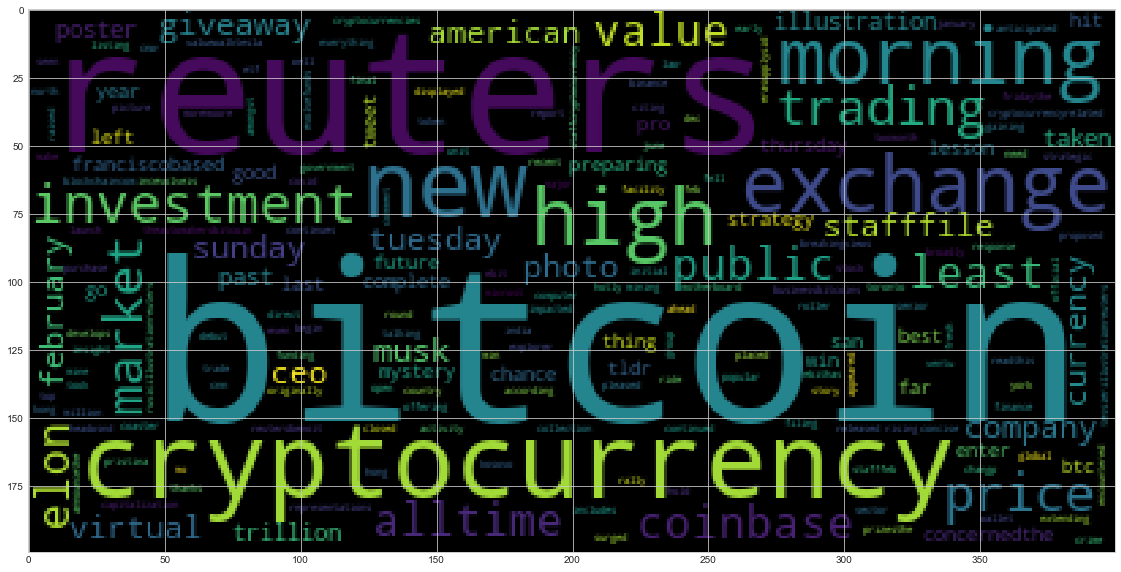

In [67]:
# Generate the Bitcoin word cloud
btc_wc = WordCloud().generate(btc_big_string)
plt.imshow(btc_wc)

In [68]:
# Convert a list of tokens into a single string of tokens
eth_big_string = ' '.join([str(elem) for elem in eth_flat_word_tokenized_list ])
print(eth_big_string)

famed auction house christies sold first purely digital piece art whopping million price buyer got digital file collage image complex legac worried geforce rtx sold cryptocurrency miner snap every gpu sight nvidia think simple way help make new card unattractive crypto crowd nfts latest cryptocurrency rage day band like kings leon releasing next album limited edition golden ticket nba digital collectible sold million nfts nonfungible token scarce digital content represented token driving new wave crypto adoptionthanks ethereum blockchain artist gaming company content cre first christies auction digital artwork backed nft nonfungible token still day away one notable sale world already taken place chris torres cr attempting get ahead cryptocurrency miner might snatch good chunk rtx stock gpu go sale next nvidia morning dedicated card new york reuters ethereum second largest cryptocurrency term market capitalization volume hit record high thursday lifted growing institutional interest spa

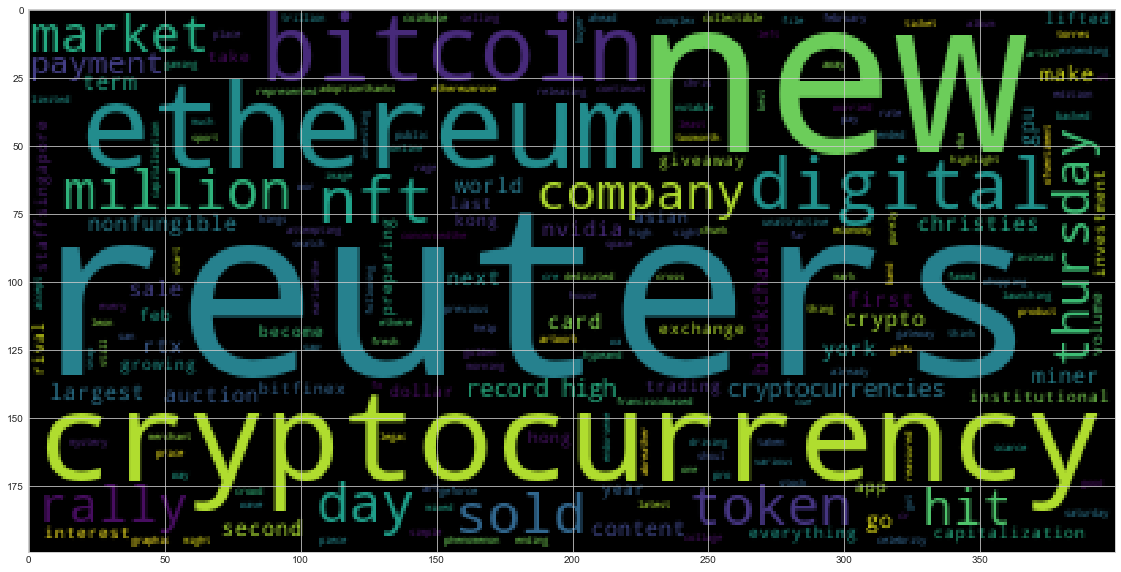

In [69]:
# Generate the Ethereum word cloud
eth_wc = WordCloud().generate(eth_big_string)
plt.imshow(eth_wc)

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [70]:
import spacy
from spacy import displacy

In [71]:
# Optional - download a language model for SpaCy
# !python -m spacy download en_core_web_sm

In [72]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [73]:
# Concatenate all of the Bitcoin text together

# Compile the list of lists of texts for each Bitcoin article
btc_text = []
for text in bitcoin_df.text:
    btc_text.append(text)
    
# Convert a list of texts into a single string of texts   
btc_text_string = ' '.join([str(elem) for elem in btc_text])
print(btc_text_string)

Some things are best left a mystery at least as far as Coinbase is concerned. 
The San Francisco-based cryptocurrency exchange has been preparing to go public since last year, and in a Thursday pros… [+1953 chars]  Bitcoin is the future, again: this morning, it hit an all-time high value of over $50,000. Is there a lesson in here? Are Elon Musks tweets a good investment strategy? Should we get in on this? We ha… [+3198 chars] TL;DR: Enter the The Complete Bitcoin (BTC) Investment Giveaway for a chance to win over $12,000 in cryptocurrency-related prizes.
The Bitcoin Investment Giveaway includes everything you need to get… [+1641 chars] A proposed law in India would make it a crime to mine, trade, or even hold cryptocurrencies like bitcoin in the country, according to a new report from Reuters citing a senior government official. It… [+1725 chars] New York (CNN Business)Bitcoin's roller coaster ride continues. The top cryptocurrency surged to a new all-time high above $58,000 on Sunday 

In [74]:
# Run the NER processor on all of the text
btc_doc = nlp(btc_text_string)

In [75]:
# Add a title to the document
btc_doc.user_data["title"] = "Bitcoin NER"

In [76]:
# Render the visualization
displacy.render(btc_doc, style='ent')

In [77]:
# List all Entities
# Get geopolitical and organizational entities
btc_entities = [ent.text for ent in btc_doc.ents if ent.label_ in ['GPE', 'ORG']]
print(btc_entities)

['San Francisco', 'India', 'Reuters', 'New York', 'CNN', 'Blockchain.com', 'Binance', 'Changp', 'Reuters', 'Benoit Tessier/Illustration', 'Reuters', 'Reuters', 'Reuters', 'Reuters', 'Reuters', 'Reuters', 'Pristina', 'Kosovo', 'HONG KONG', 'Reuters Breakingviews', 'Eastern Time', 'The U.S. Department of Justice', 'Lazarus', 'DPKR', 'Bitcoin']


---

### Ethereum NER

In [78]:
# Concatenate all of the Ethereum text together

# Compile the list of lists of texts for each Bitcoin article
eth_text = []
for text in ethereum_df.text:
    eth_text.append(text)
    
# Convert a list of texts into a single string of texts   
eth_text_string = ' '.join([str(elem) for elem in eth_text])
print(eth_text_string)

Famed auction house Christies just sold its first purely digital piece of art for a whopping $69 million. For that price, the buyer got a digital file of a collage of 5,000 images and a complex legac… [+12891 chars] Worried that the GeForce RTX 3060 will be sold out as cryptocurrency miners snap up every GPU in sight? NVIDIA thinks it has a simple way to help: make the new card unattractive to the crypto crowd. … [+1652 chars] NFTs are the latest cryptocurrency rage these days, with bands like Kings of Leon releasing their next album as limited edition "golden tickets," and NBA digital collectibles being sold for millions … [+7287 chars] NFTs (non-fungible tokens) — or scarce digital content represented as tokens — are driving a new wave of crypto adoption.
Thanks to the Ethereum blockchain, artists, gaming companies and content cre… [+5365 chars] While the first Christie's auction of digital artwork backed by NFT (non-fungible token) is still a few days away, one of the most notable s

In [79]:
# Run the NER processor on all of the text
eth_doc = nlp(eth_text_string)

# Add a title to the document
# YOUR CODE HERE!
eth_doc.user_data["title"] = "Ethereum NER"

In [80]:
# Render the visualization
displacy.render(eth_doc, style='ent')

In [81]:
# List all Entities
eth_entities = [ent.text for ent in eth_doc.ents if ent.label_ in ['GPE', 'ORG']]
print(eth_entities)

['Christies', 'GeForce', '3060', 'GPU', 'NBA', 'Ethereum', "Christie's", 'NFT', 'GPU', 'NEW YORK', 'Reuters', 'NEW YORK', 'Reuters', 'Ethereum ended', 'San Francisco', 'Bitfinex', 'Bitfinex', 'Reuters', 'Reuters', 'World FX', 'Reuters', 'Meitu', 'Hong Kong', 'China', 'HONG KONG', 'Reuters', 'Reuters', 'SINGAPORE', 'Reuters', 'Ethereum', 'India', 'Reuters', 'Reuters', 'Reuters']


---